In [675]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [676]:
#한 화면에 모두 출력하기 위한 옵션
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [677]:
import matplotlib
import matplotlib.pyplot as plt
# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='Malgun Gothic') # For Windows, Ubuntu
# plt.rcParams['axes.unicode_minus']=False  #음수일때 -가 깨져보이는 현상 방지
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')
# %matplotlib inline
import seaborn as sns
#경고출력 무시하도록 설정
import warnings
warnings.filterwarnings(action='ignore')

# 파일 불러오기

In [678]:
# 파일명
file_name = '######Rectal_NET_통계용.xlsx'

In [679]:
# Daraframe형식으로 엑셀 파일 읽기
df = pd.read_excel(file_name)

# 데이터 사이즈 출력
print(df.shape)

(190, 65)


In [680]:
print(df.shape)
df = df.iloc[:,:42]
print(df.shape)

(190, 65)
(190, 42)


In [681]:
# 데이터 프레임 출력
df.head()

,Case_번호,구제치료 시 residual lesion 유무\n0. 없음 1. 있음 2. unknown (APC),이름_이니셜,참여기관명\n1. 전남대\n2. 화순전남대\n3. 영남대\n4. 세브란스\n5. 한림대,성별 \n1: 남자\n2: 여자,잔단시 나이,생년월일\n(YYYY-MM-DD),절제전 육안적 크기\nmm,5mm 이하 1\n5mm 초과 2,병변의 모양\n1. SEL\n2. Sessile\n3. polypoid\n4. ulcerofungating\n5. ulceroinfiltrative,Surface change\n1. smooth\n2. depressed or eroded\n3. ulcerated,Surface color\n1. normal or yellow\n2. hyperemic,병변의 위치\n1. upper rectum (AV 12-15cm)\n2. mid rectum (AV 7-11cm)\n3. lower rectum (AV 0-6cm),시술 시행 의사 1. Tertiary-Expert\n2. Tertiary-Trainee\n3. Non tertiary,1.Tertiaryexpert\n3.non tertiary expert,Endoscopic resection날짜 \nYYYY-MM-DD,시술 방법\n1. cold forcep polypectomy\n2. cold snare polypectomy\n3. Hot snare polypectomy(without injection)\n4. conventional EMR\n5. cap-assisted EMR\n6. EMR-L\n7. precut EMR\n8. tip-in EMR (anchoring EMR)\n9. ESD,절제 전 NET 가능성을 인지했는지 여부\n0. No\n1. Yes,CT 시행 여부\n1:시행안함\n2:시행함,MRI 시행 여부\n1:시행안함\n2:시행함,초음파내시경 시행여부 1:시행안함\n2:시행함,초음파내시경 소견\n1. no PM invasion\n2. Abutting PM \n3. PM invasion,endoscopically suspected remnant tumor after primary therapy (1차 절제 후 육안적으로 잔여병변 보이거나 의심되는 경우)\n0. No\n1. Yes,Tumor size (조직검사 결과상 종양의 크기)\nmm,1. 10mm이하\n2. 10mm초과,"Tumor size(조직검사 결과 우선, 없을 경우 육안크기)",Histologic type 1. Gr 1\n2. Gr 2,Depth of invasion\n1. superficial mucosa 국한\n2. muscularis mucosa (2층)\n3 submucosa (3층)\n4. PM,SM invasion이 있을 경우 depth\n( )um,Basal margin 0. negative\n1. positive\n2. indeterminate,Lateral margin 0. negative\n1. positive\n2. indeterminate,Both margin 0. negative\n1. positive\n2. indeterminate,deep margin 인지 lateral margin인지 모르는 경우\n0. negative\n1. positive\n2. indeterminate,Basal or lateral\n0: negative\n1. positive\n2. indeterminate,LVI \n0. negative\n1. positive\n2. indeterminate,mitotic count\n( )HPFs,Ki-67 index\n( ) %,Synchronous NET\n0. No\n1. Yes,Synchronous lesion 치료\n1. none\n2. endoscopic resection\n3. Surgery,구제 치료 시행 방법\n1. conventional EMR\n2. cap-assisted EMR\n3. EMR-L\n4. precut EMR\n5. tip-in EMR (anchoring EMR)\n6. ESD\n7. local excision(TAE/TEO)\n8. Radical surgery\n9. APC,구제 치료 시행 날짜\nYYYY-MM-DD,구제치료 시 residual lesion 유무\n0. 없음 1. 있음 2. unknown (APC).1
0,10480236,0,LEH,1,2,46,1976-09-01,14,2,1,3,1,3,2,3,2022-11-21,9,1,1,1,2,1.0,0,13,NaN,13.0,1,NaN,NaN,1.0,NaN,NaN,NaN,1,0,2,2,0.0,NaN,7,2023-01-10,0
1,10538460,0,BYS,2,2,75,1947-12-11,7,2,1,1,2,2,1,1,2023-04-26,9,1,2,2,1,NaN,0,5,NaN,5.0,1,3,NaN,1.0,NaN,NaN,NaN,1,0,1,2,0.0,NaN,8,2023-05-26,0
2,12287857,1,PCJ,1,2,78,1938-06-14,6,2,3,1,1,3,3,3,2017-06-02,4,0,1,1,1,NaN,1,4,NaN,4.0,1,NaN,NaN,1.0,NaN,NaN,NaN,1,2,0,1,0.0,NaN,4,2017-08-18,1
3,12551401,1,PCM,1,1,41,1973-11-05,6,2,1,1,1,3,3,3,2015-08-10,4,1,1,1,1,NaN,1,6,NaN,6.0,1,NaN,NaN,NaN,NaN,NaN,1.0,1,0,0,2,1.0,2.0,9,2015-09-18,0
4,19493236,1,KKW,2,1,57,1961-01-24,4,1,1,1,1,3,3,3,2018-10-31,4,1,1,1,1,NaN,1,3,NaN,3.0,1,NaN,NaN,NaN,NaN,NaN,1.0,1,0,0,1,0.0,NaN,7,2018-12-14,1


# 컬럼 선택 및 삭제

In [682]:
cols = [
'Case_번호',"1구제치료 시 residual lesion 유무",'이름_이니셜','참여기관명','성별','진단시 나이','생년월일','절제전 육안적 크기','절제전 육안적 분류','병변의 모양',
    'Surface change','Surface color','병변의 위치','시술 시행 의사','시술 시행 의사 단계','Endoscopic resection날짜','시술 방법','절제 전 NET 가능성을 인지했는지 여부',
    'CT 시행 여부','MRI 시행 여부','초음파내시경 시행여부','초음파내시경 소견','endoscopically suspected remnant tumor after primary therapy', 
    'Tumor size(조직검사 결과상 종양의 크기)', 'Tumor size(조직검사 결과상 종양의 크기)구분','Tumor size(조직검사 결과 우선, 없을 경우 육안크기)','Histologic type',
    'Depth of invasion','SM invasion이 있을 경우 depth','Basal margin','Lateral margin','Both margin','deep margin 인지 lateral margin인지 모르는 경우',
    'Basal or lateral','LVI','mitotic count','Ki-67 index','Synchronous NET','Synchronous lesion 치료','구제 치료 시행 방법','구제 치료 시행 날짜',
    '구제치료 시 residual lesion 유무'       
       ]

In [683]:
df.columns = cols

In [684]:
df.head()

,Case_번호,1구제치료 시 residual lesion 유무,이름_이니셜,참여기관명,성별,진단시 나이,생년월일,절제전 육안적 크기,절제전 육안적 분류,병변의 모양,Surface change,Surface color,병변의 위치,시술 시행 의사,시술 시행 의사 단계,Endoscopic resection날짜,시술 방법,절제 전 NET 가능성을 인지했는지 여부,CT 시행 여부,MRI 시행 여부,초음파내시경 시행여부,초음파내시경 소견,endoscopically suspected remnant tumor after primary therapy,Tumor size(조직검사 결과상 종양의 크기),Tumor size(조직검사 결과상 종양의 크기)구분,"Tumor size(조직검사 결과 우선, 없을 경우 육안크기)",Histologic type,Depth of invasion,SM invasion이 있을 경우 depth,Basal margin,Lateral margin,Both margin,deep margin 인지 lateral margin인지 모르는 경우,Basal or lateral,LVI,mitotic count,Ki-67 index,Synchronous NET,Synchronous lesion 치료,구제 치료 시행 방법,구제 치료 시행 날짜,구제치료 시 residual lesion 유무
0,10480236,0,LEH,1,2,46,1976-09-01,14,2,1,3,1,3,2,3,2022-11-21,9,1,1,1,2,1.0,0,13,NaN,13.0,1,NaN,NaN,1.0,NaN,NaN,NaN,1,0,2,2,0.0,NaN,7,2023-01-10,0
1,10538460,0,BYS,2,2,75,1947-12-11,7,2,1,1,2,2,1,1,2023-04-26,9,1,2,2,1,NaN,0,5,NaN,5.0,1,3,NaN,1.0,NaN,NaN,NaN,1,0,1,2,0.0,NaN,8,2023-05-26,0
2,12287857,1,PCJ,1,2,78,1938-06-14,6,2,3,1,1,3,3,3,2017-06-02,4,0,1,1,1,NaN,1,4,NaN,4.0,1,NaN,NaN,1.0,NaN,NaN,NaN,1,2,0,1,0.0,NaN,4,2017-08-18,1
3,12551401,1,PCM,1,1,41,1973-11-05,6,2,1,1,1,3,3,3,2015-08-10,4,1,1,1,1,NaN,1,6,NaN,6.0,1,NaN,NaN,NaN,NaN,NaN,1.0,1,0,0,2,1.0,2.0,9,2015-09-18,0
4,19493236,1,KKW,2,1,57,1961-01-24,4,1,1,1,1,3,3,3,2018-10-31,4,1,1,1,1,NaN,1,3,NaN,3.0,1,NaN,NaN,NaN,NaN,NaN,1.0,1,0,0,1,0.0,NaN,7,2018-12-14,1


In [685]:
# 개인정보 제거
del df['Case_번호']
del df["1구제치료 시 residual lesion 유무"]
del df['이름_이니셜']
del df['참여기관명']
del df['생년월일']
print(df.shape)

(190, 37)


# 결측치 확인

In [686]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 37 columns):
 #   Column                                                        Non-Null Count  Dtype         
---  ------                                                        --------------  -----         
 0   성별                                                            190 non-null    int64         
 1   진단시 나이                                                        190 non-null    int64         
 2   절제전 육안적 크기                                                    190 non-null    int64         
 3   절제전 육안적 분류                                                    190 non-null    int64         
 4   병변의 모양                                                        190 non-null    int64         
 5   Surface change                                                190 non-null    int64         
 6   Surface color                                                 190 non-null    int64         
 7   병변의 위치  

In [687]:
# 컬럼별 결측치 파악하기
df.isna().sum()

성별                                                                0
진단시 나이                                                            0
절제전 육안적 크기                                                        0
절제전 육안적 분류                                                        0
병변의 모양                                                            0
Surface change                                                    0
Surface color                                                     0
병변의 위치                                                            0
시술 시행 의사                                                          0
시술 시행 의사 단계                                                       0
Endoscopic resection날짜                                            0
시술 방법                                                             0
절제 전 NET 가능성을 인지했는지 여부                                            0
CT 시행 여부                                                          0
MRI 시행 여부                                       

<Axes: >

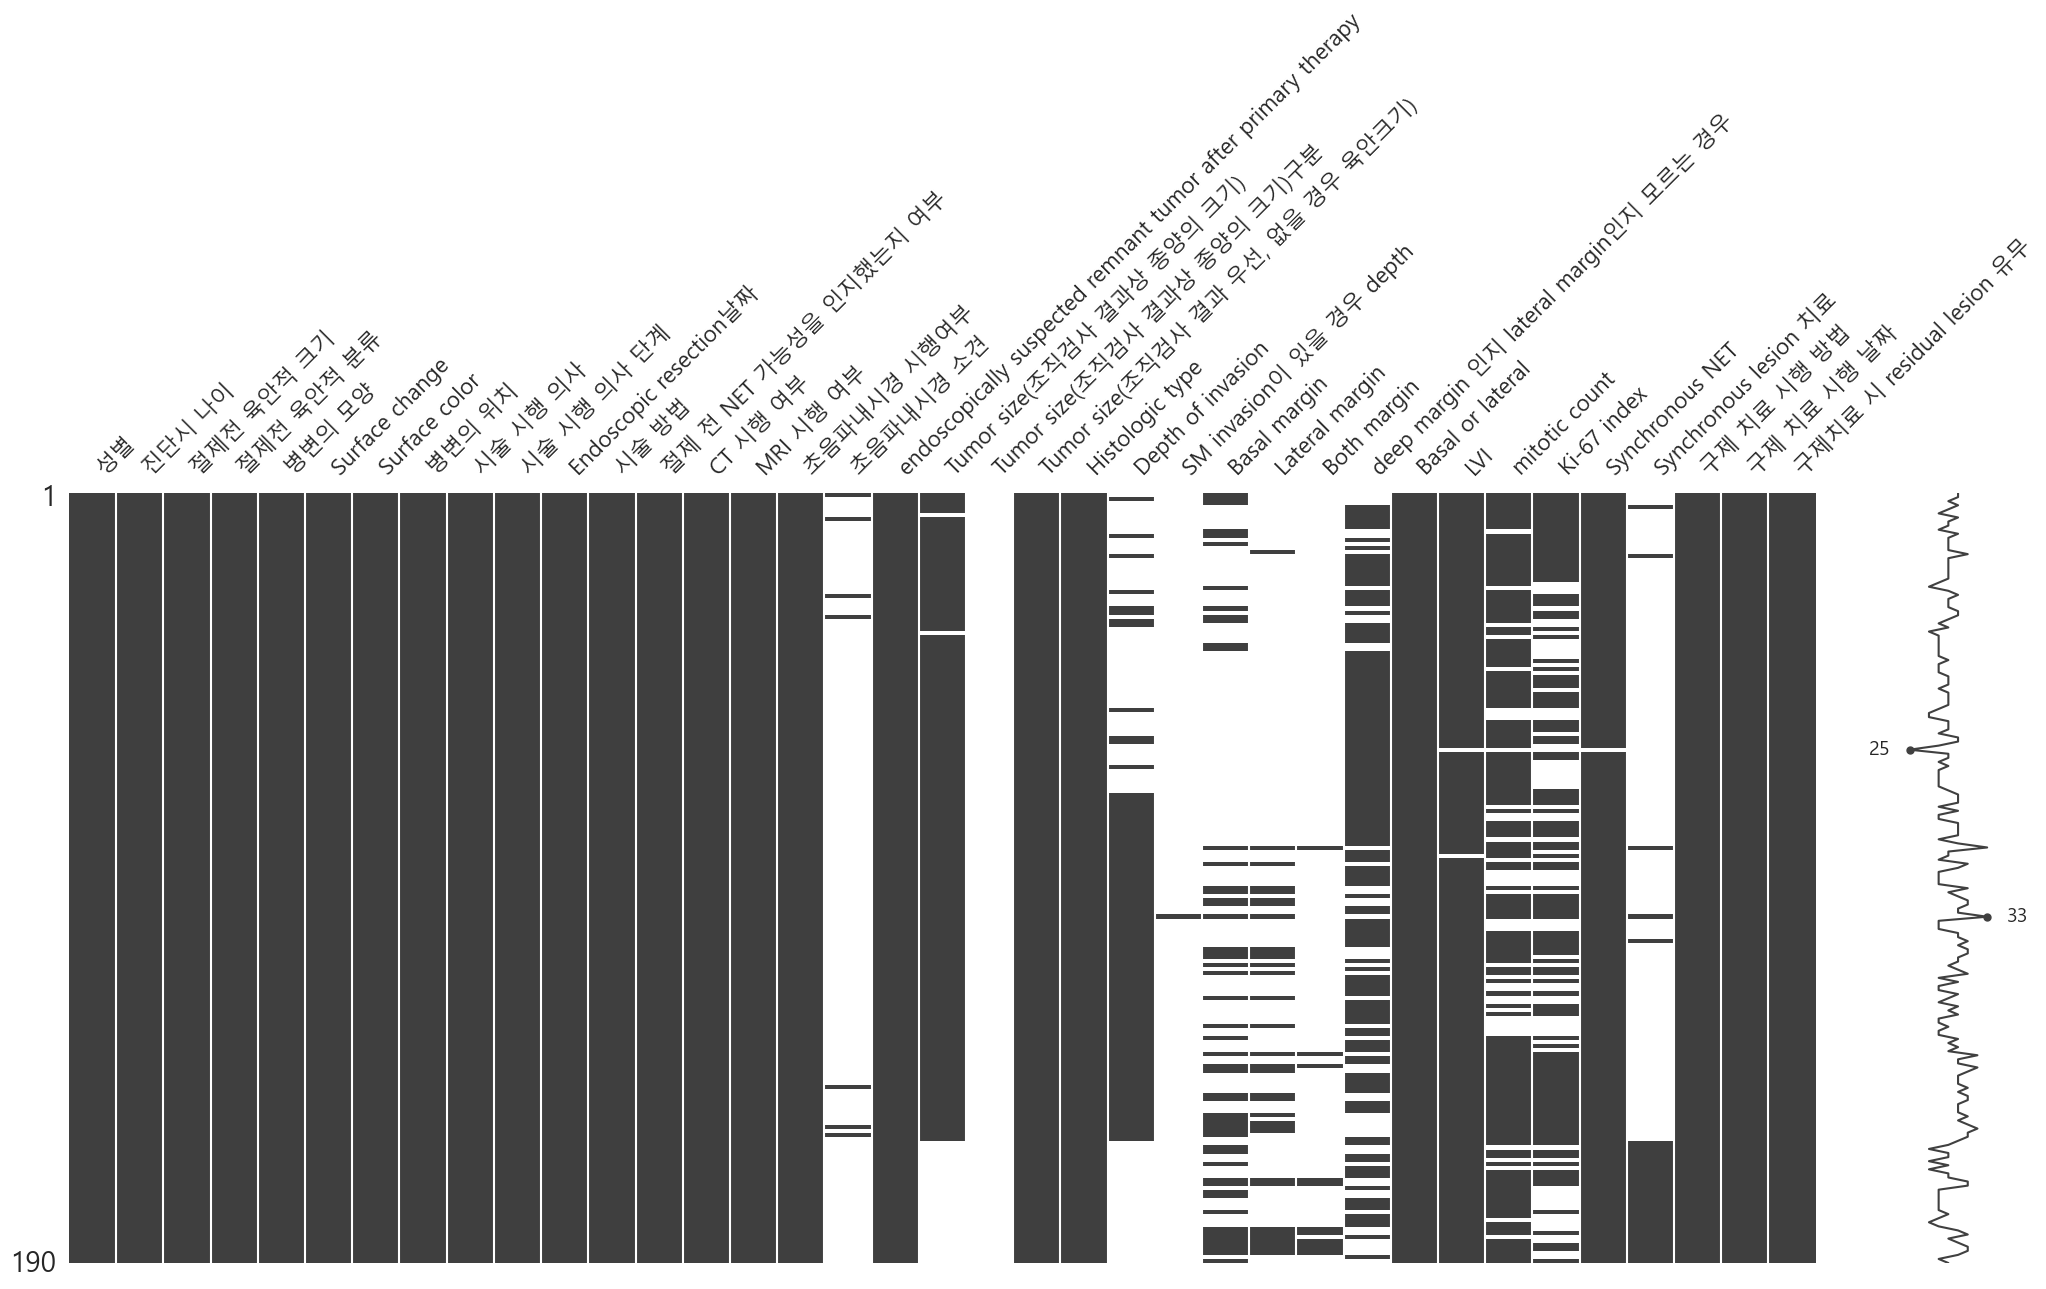

In [688]:
%matplotlib inline
import missingno as msno

msno.matrix(df)

<Axes: >

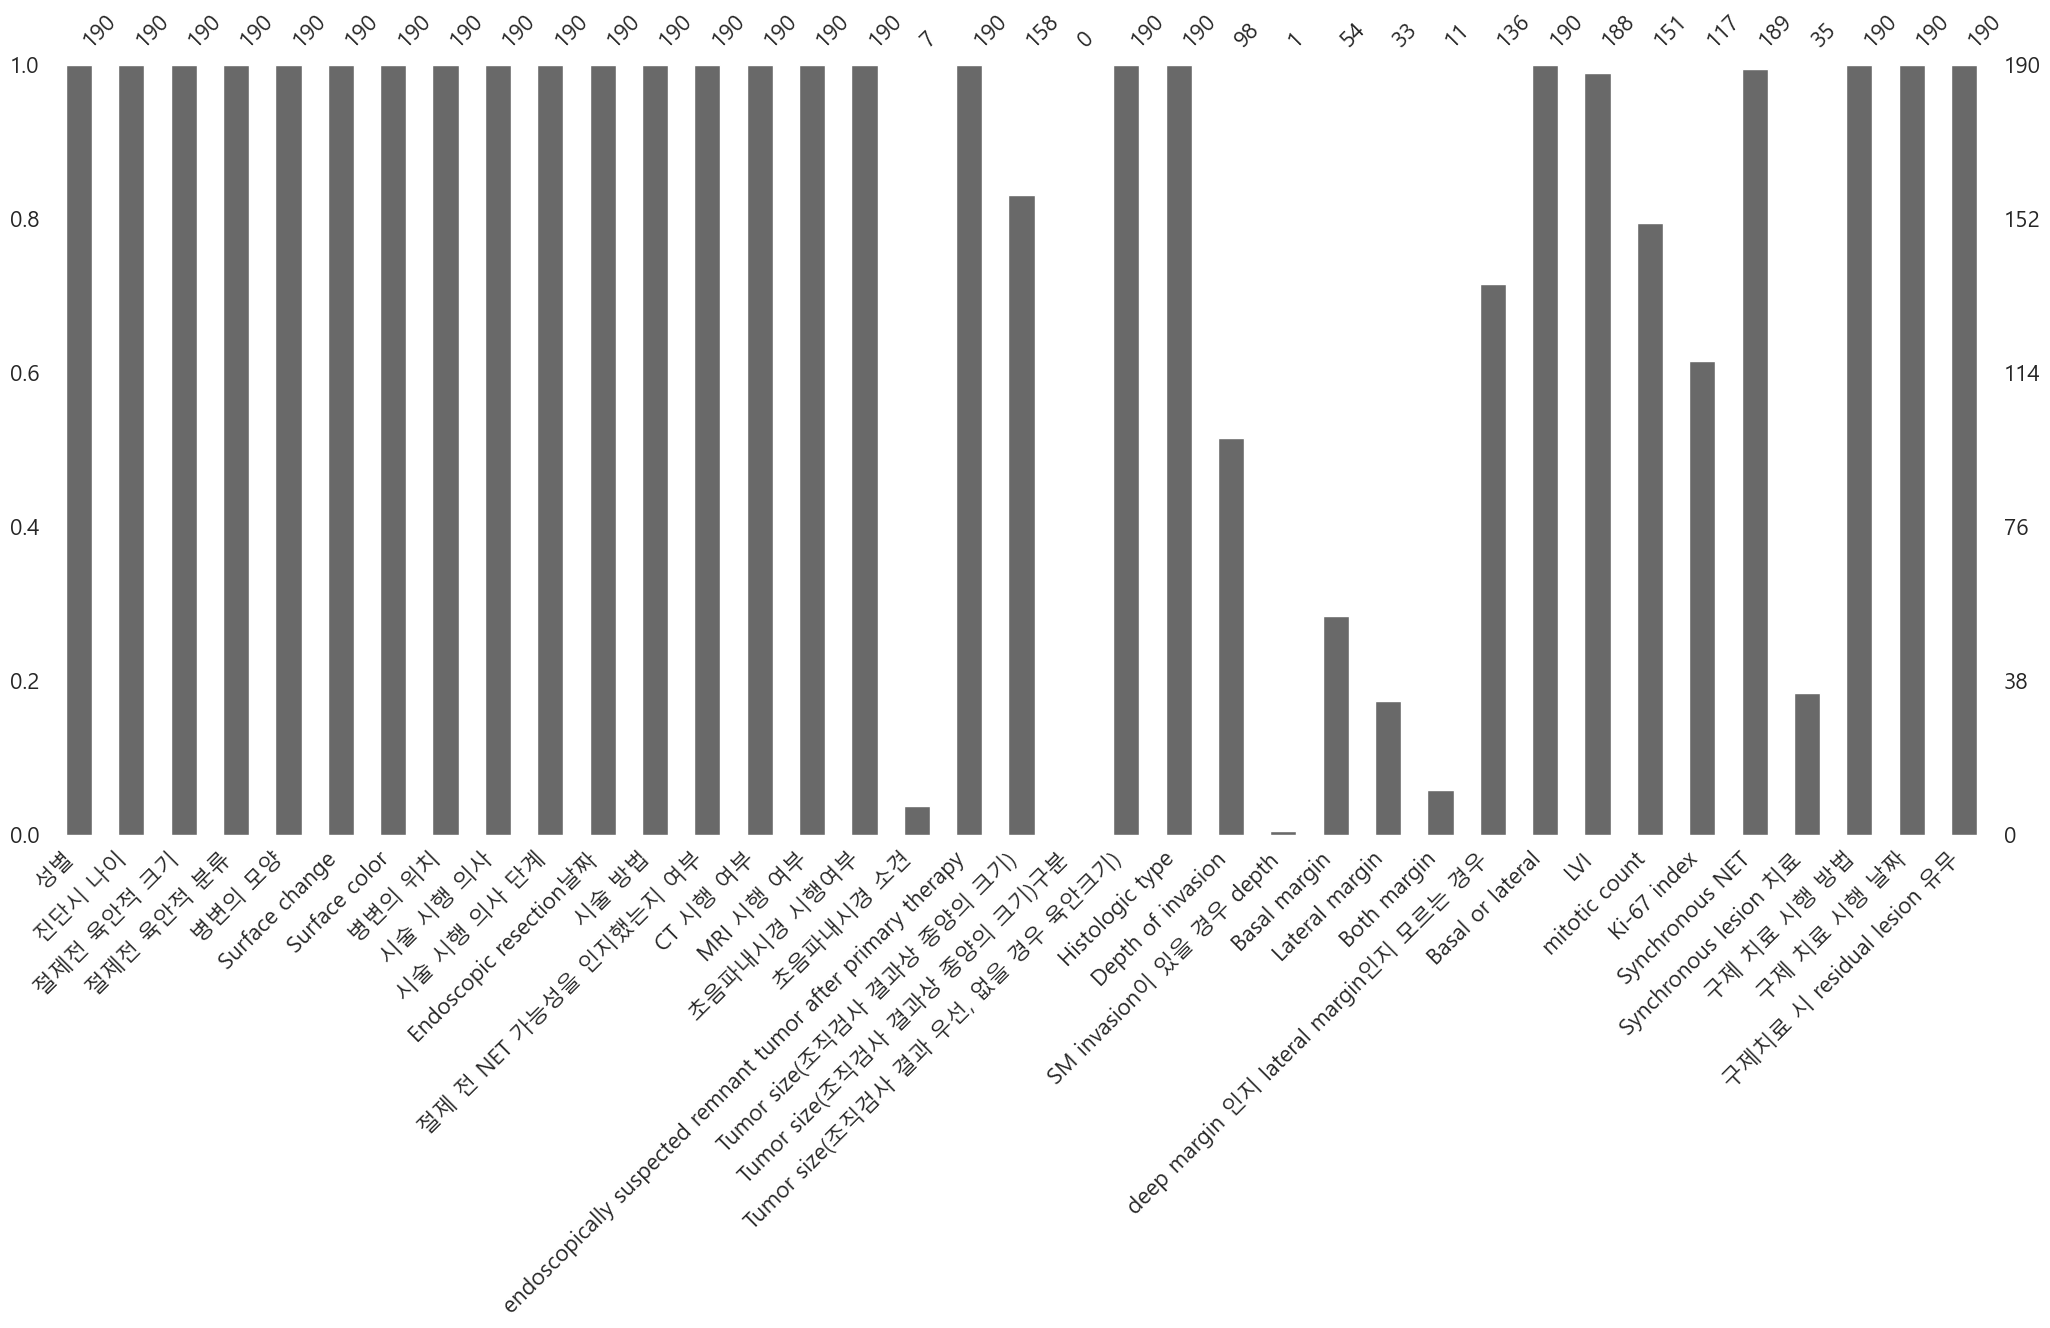

In [689]:
msno.bar(df)

In [690]:
df.columns

Index(['성별', '진단시 나이', '절제전 육안적 크기', '절제전 육안적 분류', '병변의 모양', 'Surface change', 'Surface color', '병변의 위치', '시술 시행 의사', '시술 시행 의사 단계', 'Endoscopic resection날짜', '시술 방법', '절제 전 NET 가능성을 인지했는지 여부', 'CT 시행 여부', 'MRI 시행 여부', '초음파내시경 시행여부', '초음파내시경 소견', 'endoscopically suspected remnant tumor after primary therapy', 'Tumor size(조직검사 결과상 종양의 크기)', 'Tumor size(조직검사 결과상 종양의 크기)구분', 'Tumor size(조직검사 결과 우선, 없을 경우 육안크기)', 'Histologic type', 'Depth of invasion', 'SM invasion이 있을 경우 depth', 'Basal margin', 'Lateral margin', 'Both margin', 'deep margin 인지 lateral margin인지 모르는 경우', 'Basal or lateral', 'LVI', 'mitotic count', 'Ki-67 index', 'Synchronous NET', 'Synchronous lesion 치료', '구제 치료 시행 방법', '구제 치료 시행 날짜', '구제치료 시 residual lesion 유무'], dtype='object')

In [691]:
# 결측치가 많은 정보 제거
df = df.drop('Tumor size(조직검사 결과 우선, 없을 경우 육안크기)', axis=1)
df = df.drop('Histologic type', axis=1)
df = df.drop('Depth of invasion', axis=1)
df = df.drop('SM invasion이 있을 경우 depth', axis=1)
df = df.drop('Basal margin', axis=1)
df = df.drop('Lateral margin', axis=1)
df = df.drop('Both margin', axis=1)
df = df.drop('mitotic count', axis=1)
df = df.drop('Ki-67 index', axis=1)
# df = df.drop('Synchronous NET', axis=1)  # 삭제 후보
print(df.shape)
df.head()

(190, 28)


,성별,진단시 나이,절제전 육안적 크기,절제전 육안적 분류,병변의 모양,Surface change,Surface color,병변의 위치,시술 시행 의사,시술 시행 의사 단계,Endoscopic resection날짜,시술 방법,절제 전 NET 가능성을 인지했는지 여부,CT 시행 여부,MRI 시행 여부,초음파내시경 시행여부,초음파내시경 소견,endoscopically suspected remnant tumor after primary therapy,Tumor size(조직검사 결과상 종양의 크기),Tumor size(조직검사 결과상 종양의 크기)구분,deep margin 인지 lateral margin인지 모르는 경우,Basal or lateral,LVI,Synchronous NET,Synchronous lesion 치료,구제 치료 시행 방법,구제 치료 시행 날짜,구제치료 시 residual lesion 유무
0,2,46,14,2,1,3,1,3,2,3,2022-11-21,9,1,1,1,2,1.0,0,13,NaN,NaN,1,0,0.0,NaN,7,2023-01-10,0
1,2,75,7,2,1,1,2,2,1,1,2023-04-26,9,1,2,2,1,NaN,0,5,NaN,NaN,1,0,0.0,NaN,8,2023-05-26,0
2,2,78,6,2,3,1,1,3,3,3,2017-06-02,4,0,1,1,1,NaN,1,4,NaN,NaN,1,2,0.0,NaN,4,2017-08-18,1
3,1,41,6,2,1,1,1,3,3,3,2015-08-10,4,1,1,1,1,NaN,1,6,NaN,1.0,1,0,1.0,2.0,9,2015-09-18,0
4,1,57,4,1,1,1,1,3,3,3,2018-10-31,4,1,1,1,1,NaN,1,3,NaN,1.0,1,0,0.0,NaN,7,2018-12-14,1


In [692]:
df.columns

Index(['성별', '진단시 나이', '절제전 육안적 크기', '절제전 육안적 분류', '병변의 모양', 'Surface change', 'Surface color', '병변의 위치', '시술 시행 의사', '시술 시행 의사 단계', 'Endoscopic resection날짜', '시술 방법', '절제 전 NET 가능성을 인지했는지 여부', 'CT 시행 여부', 'MRI 시행 여부', '초음파내시경 시행여부', '초음파내시경 소견', 'endoscopically suspected remnant tumor after primary therapy', 'Tumor size(조직검사 결과상 종양의 크기)', 'Tumor size(조직검사 결과상 종양의 크기)구분', 'deep margin 인지 lateral margin인지 모르는 경우', 'Basal or lateral', 'LVI', 'Synchronous NET', 'Synchronous lesion 치료', '구제 치료 시행 방법', '구제 치료 시행 날짜', '구제치료 시 residual lesion 유무'], dtype='object')

In [693]:
# # 컬럼명 변경 : 공백제거, _로 대체
# df = df.rename( columns={'진단시 나이':'진단시_나이',
#             '절제전 육안적 크기':'절제전_육안적_크기',
#             '절제전 육안적 분류':'절제전_육안적_분류',
#             :,
#             :,
#             :,
            
#             :,})
# df.head()

In [694]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 28 columns):
 #   Column                                                        Non-Null Count  Dtype         
---  ------                                                        --------------  -----         
 0   성별                                                            190 non-null    int64         
 1   진단시 나이                                                        190 non-null    int64         
 2   절제전 육안적 크기                                                    190 non-null    int64         
 3   절제전 육안적 분류                                                    190 non-null    int64         
 4   병변의 모양                                                        190 non-null    int64         
 5   Surface change                                                190 non-null    int64         
 6   Surface color                                                 190 non-null    int64         
 7   병변의 위치  

# 전처리

In [695]:
# 각 셀에 대해 값이 'no_data'인지 확인하는 마스크 생성
no_data_mask = df.applymap(lambda x: x == 'no_data')

# 각 컬럼에 대해 'no_data'가 포함된 여부를 확인
columns_with_no_data = no_data_mask.any()

# 'no_data'가 포함된 컬럼만 선택
columns_with_no_data = columns_with_no_data[columns_with_no_data].index
df_no_data_columns = df[columns_with_no_data]

# 결과 출력
print("Columns containing 'no_data' values:")
print(df_no_data_columns)

Columns containing 'no_data' values:
    Tumor size(조직검사 결과상 종양의 크기)      LVI
0                            13        0
1                             5        0
2                             4        2
3                             6        0
4                             3        0
5                           NaN        2
6                           2.5        0
7                             4        0
8                             7        0
9                             7        2
10                            9        0
11                            6        0
12                           10        0
13                            8        1
14                           11        0
15                            7        0
16                          2.5        0
17                            2        0
18                            4        0
19                          4.5        0
20                          2.8        0
21                          1.2        0
22                  

In [696]:
df = df.replace('no_data', 0)

In [697]:
# 계산 하기
df['Tumor size(조직검사 결과상 종양의 크기)구분'] = df['Tumor size(조직검사 결과상 종양의 크기)'].apply(lambda x: 0 if x < 10 else 1)

In [698]:
# 결측치를 0 으로 채우기
df['Tumor size(조직검사 결과상 종양의 크기)'] = df['Tumor size(조직검사 결과상 종양의 크기)'].fillna(0)

# 결측치를 0 으로 채우기
df = df.fillna(0)

In [699]:
df['성별']=df['성별'].astype('category')
df['절제전 육안적 분류']=df['절제전 육안적 분류'].astype('category')
df['병변의 모양']=df['병변의 모양'].astype('category')
df['Surface change']=df['Surface change'].astype('category')
df['Surface color']=df['Surface color'].astype('category')
df['병변의 위치']=df['병변의 위치'].astype('category')
df['시술 시행 의사']=df['시술 시행 의사'].astype('category')
df['시술 시행 의사 단계']=df['시술 시행 의사 단계'].astype('category')
df['시술 방법']=df['시술 방법'].astype('category')
df['절제 전 NET 가능성을 인지했는지 여부']=df['절제 전 NET 가능성을 인지했는지 여부'].astype('category')
df['CT 시행 여부']=df['CT 시행 여부'].astype('category')
df['MRI 시행 여부']=df['MRI 시행 여부'].astype('category')
df['초음파내시경 시행여부']=df['초음파내시경 시행여부'].astype('category')
df['초음파내시경 소견']=df['초음파내시경 소견'].astype('category')
df['endoscopically suspected remnant tumor after primary therapy']=df['endoscopically suspected remnant tumor after primary therapy'].astype('category')
df['Tumor size(조직검사 결과상 종양의 크기)구분']=df['Tumor size(조직검사 결과상 종양의 크기)구분'].astype('category')
df['deep margin 인지 lateral margin인지 모르는 경우']=df['deep margin 인지 lateral margin인지 모르는 경우'].astype('category')
df['Basal or lateral']=df['Basal or lateral'].astype('category')
df['LVI']=df['LVI'].astype('category')
df['Synchronous NET']=df['Synchronous NET'].astype('category')
df['Synchronous lesion 치료']=df['Synchronous lesion 치료'].astype('category')
df['구제 치료 시행 방법']=df['구제 치료 시행 방법'].astype('category')
df['구제치료 시 residual lesion 유무']=df['구제치료 시 residual lesion 유무'].astype('category')

In [700]:
df['Endoscopic resection날짜']=pd.to_datetime(df['Endoscopic resection날짜'])
df['구제 치료 시행 날짜']=pd.to_datetime(df['구제 치료 시행 날짜'])
df['elapsed_days'] = (df['구제 치료 시행 날짜'] - df['Endoscopic resection날짜']).dt.days

In [701]:
del df['Endoscopic resection날짜']
del df['구제 치료 시행 날짜']

In [702]:
df[df['elapsed_days']<0]  # 이상 발견
# 일단 삭제,  확인되면 수종

,성별,진단시 나이,절제전 육안적 크기,절제전 육안적 분류,병변의 모양,Surface change,Surface color,병변의 위치,시술 시행 의사,시술 시행 의사 단계,시술 방법,절제 전 NET 가능성을 인지했는지 여부,CT 시행 여부,MRI 시행 여부,초음파내시경 시행여부,초음파내시경 소견,endoscopically suspected remnant tumor after primary therapy,Tumor size(조직검사 결과상 종양의 크기),Tumor size(조직검사 결과상 종양의 크기)구분,deep margin 인지 lateral margin인지 모르는 경우,Basal or lateral,LVI,Synchronous NET,Synchronous lesion 치료,구제 치료 시행 방법,구제치료 시 residual lesion 유무,elapsed_days


In [703]:
# 'elapsed_days' 컬럼의 값이 0 이하인 행을 제거
# df = df[df['elapsed_days'] > 0]
# print(df.shape)

# 확인하기

In [704]:
# 숫자형 열 분류
numeric_df = df.select_dtypes(include='number')

# 카테고리형 열 분류 (문자열도 포함됨)
categorical_df = df.select_dtypes(include='category')

# 숫자형 열의 describe
numeric_desc = numeric_df.describe()
numeric_desc

,진단시 나이,절제전 육안적 크기,Tumor size(조직검사 결과상 종양의 크기),elapsed_days
count,190.000000,190.000000,190.000000,190.000000
mean,49.989474,5.836842,3.484211,59.031579
std,12.531860,2.412426,2.673872,53.264232
min,14.000000,1.000000,0.000000,9.000000
25%,41.000000,5.000000,1.575000,28.250000
50%,50.000000,5.000000,3.000000,43.500000
75%,58.000000,7.000000,5.000000,70.000000
max,80.000000,15.000000,13.000000,395.000000


In [705]:
# 각 카테고리형 열의 값 빈도 확인
for column in categorical_df.columns:
    value_counts = categorical_df[column].value_counts()
    print(f"Column '{column}' value counts:\n{value_counts}\n")

Column '성별' value counts:
성별
1    120
2     70
Name: count, dtype: int64

Column '절제전 육안적 분류' value counts:
절제전 육안적 분류
1    96
2    94
Name: count, dtype: int64

Column '병변의 모양' value counts:
병변의 모양
1    159
3     21
2     10
Name: count, dtype: int64

Column 'Surface change' value counts:
Surface change
1    183
2      6
3      1
Name: count, dtype: int64

Column 'Surface color' value counts:
Surface color
1    174
2     16
Name: count, dtype: int64

Column '병변의 위치' value counts:
병변의 위치
2    83
3    83
1    24
Name: count, dtype: int64

Column '시술 시행 의사' value counts:
시술 시행 의사
3    140
1     45
2      5
Name: count, dtype: int64

Column '시술 시행 의사 단계' value counts:
시술 시행 의사 단계
3    145
1     45
Name: count, dtype: int64

Column '시술 방법' value counts:
시술 방법
4    87
1    42
2    34
5     9
6     8
9     6
7     3
8     1
Name: count, dtype: int64

Column '절제 전 NET 가능성을 인지했는지 여부' value counts:
절제 전 NET 가능성을 인지했는지 여부
0    101
1     89
Name: count, dtype: int64

Column 'CT 시행 여부' value count

In [706]:
# 컬럼별 결측치 파악하기
df.isna().sum()

성별                                                              0
진단시 나이                                                          0
절제전 육안적 크기                                                      0
절제전 육안적 분류                                                      0
병변의 모양                                                          0
Surface change                                                  0
Surface color                                                   0
병변의 위치                                                          0
시술 시행 의사                                                        0
시술 시행 의사 단계                                                     0
시술 방법                                                           0
절제 전 NET 가능성을 인지했는지 여부                                          0
CT 시행 여부                                                        0
MRI 시행 여부                                                       0
초음파내시경 시행여부                                                     0
초음파내시경 소견 

In [707]:
df.head()

,성별,진단시 나이,절제전 육안적 크기,절제전 육안적 분류,병변의 모양,Surface change,Surface color,병변의 위치,시술 시행 의사,시술 시행 의사 단계,시술 방법,절제 전 NET 가능성을 인지했는지 여부,CT 시행 여부,MRI 시행 여부,초음파내시경 시행여부,초음파내시경 소견,endoscopically suspected remnant tumor after primary therapy,Tumor size(조직검사 결과상 종양의 크기),Tumor size(조직검사 결과상 종양의 크기)구분,deep margin 인지 lateral margin인지 모르는 경우,Basal or lateral,LVI,Synchronous NET,Synchronous lesion 치료,구제 치료 시행 방법,구제치료 시 residual lesion 유무,elapsed_days
0,2,46,14,2,1,3,1,3,2,3,9,1,1,1,2,1.0,0,13.0,1,0.0,1,0.0,0.0,0.0,7,0,50
1,2,75,7,2,1,1,2,2,1,1,9,1,2,2,1,0.0,0,5.0,0,0.0,1,0.0,0.0,0.0,8,0,30
2,2,78,6,2,3,1,1,3,3,3,4,0,1,1,1,0.0,1,4.0,0,0.0,1,2.0,0.0,0.0,4,1,77
3,1,41,6,2,1,1,1,3,3,3,4,1,1,1,1,0.0,1,6.0,0,1.0,1,0.0,1.0,2.0,9,0,39
4,1,57,4,1,1,1,1,3,3,3,4,1,1,1,1,0.0,1,3.0,0,1.0,1,0.0,0.0,0.0,7,1,44


# 단순화

In [708]:
# 그룹화한 변수 삭제
# 1) 절제전 육안적 분류  를 통해 10 이상/이하 구별하고 있어서  삭제
# del df['절제전 육안적 크기']
# 2) 둘 중의 하나는 제거 필요
# del df['시술 시행 의사']
del df['시술 시행 의사 단계']
# 안 좋아짐
# 3) 시술방법 단순화 - 값이 1~4이면 1로, 5~9이면 2로
# df['시술 방법'] = df['시술 방법'].apply(lambda x: 1 if 1 <= x <= 4 else (2 if 5 <= x <= 9 else x))
# df['시술 방법'] = df['시술 방법'].apply(lambda x: 1 if 1 <= x <= 3 else (2 if x == 4 else (3 if 5 <= x <= 8 else (4 if x == 9 else x))))
# df['시술 방법']=df['시술 방법'].astype('category')

# 영향 없음
# # 4) LVI 단순화
df['LVI'] = df['LVI'].apply(lambda x: 0 if x == 0 else (1 if 1 <= x <= 2 else x))
df['LVI']=df['LVI'].astype('category')
# 5) Tumor size(조직검사 결과상 종양의 크기)   를 통해 10 이상/이하 구별하고 있어서  삭제
# del df['Tumor size(조직검사 결과상 종양의 크기)']

In [709]:
print(df.shape)
df.head()

(190, 26)


,성별,진단시 나이,절제전 육안적 크기,절제전 육안적 분류,병변의 모양,Surface change,Surface color,병변의 위치,시술 시행 의사,시술 방법,절제 전 NET 가능성을 인지했는지 여부,CT 시행 여부,MRI 시행 여부,초음파내시경 시행여부,초음파내시경 소견,endoscopically suspected remnant tumor after primary therapy,Tumor size(조직검사 결과상 종양의 크기),Tumor size(조직검사 결과상 종양의 크기)구분,deep margin 인지 lateral margin인지 모르는 경우,Basal or lateral,LVI,Synchronous NET,Synchronous lesion 치료,구제 치료 시행 방법,구제치료 시 residual lesion 유무,elapsed_days
0,2,46,14,2,1,3,1,3,2,9,1,1,1,2,1.0,0,13.0,1,0.0,1,0,0.0,0.0,7,0,50
1,2,75,7,2,1,1,2,2,1,9,1,2,2,1,0.0,0,5.0,0,0.0,1,0,0.0,0.0,8,0,30
2,2,78,6,2,3,1,1,3,3,4,0,1,1,1,0.0,1,4.0,0,0.0,1,1,0.0,0.0,4,1,77
3,1,41,6,2,1,1,1,3,3,4,1,1,1,1,0.0,1,6.0,0,1.0,1,0,1.0,2.0,9,0,39
4,1,57,4,1,1,1,1,3,3,4,1,1,1,1,0.0,1,3.0,0,1.0,1,0,0.0,0.0,7,1,44


# 분석

In [710]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 26 columns):
 #   Column                                                        Non-Null Count  Dtype   
---  ------                                                        --------------  -----   
 0   성별                                                            190 non-null    category
 1   진단시 나이                                                        190 non-null    int64   
 2   절제전 육안적 크기                                                    190 non-null    int64   
 3   절제전 육안적 분류                                                    190 non-null    category
 4   병변의 모양                                                        190 non-null    category
 5   Surface change                                                190 non-null    category
 6   Surface color                                                 190 non-null    category
 7   병변의 위치                                                        

In [711]:
df.dtypes

성별                                                              category
진단시 나이                                                             int64
절제전 육안적 크기                                                         int64
절제전 육안적 분류                                                      category
병변의 모양                                                          category
Surface change                                                  category
Surface color                                                   category
병변의 위치                                                          category
시술 시행 의사                                                        category
시술 방법                                                           category
절제 전 NET 가능성을 인지했는지 여부                                          category
CT 시행 여부                                                        category
MRI 시행 여부                                                       category
초음파내시경 시행여부                                        

In [712]:
num_cols = [col for col in df.columns if df[col].dtype in ['int64','float64']]
df[num_cols].describe()

,진단시 나이,절제전 육안적 크기,Tumor size(조직검사 결과상 종양의 크기),elapsed_days
count,190.000000,190.000000,190.000000,190.000000
mean,49.989474,5.836842,3.484211,59.031579
std,12.531860,2.412426,2.673872,53.264232
min,14.000000,1.000000,0.000000,9.000000
25%,41.000000,5.000000,1.575000,28.250000
50%,50.000000,5.000000,3.000000,43.500000
75%,58.000000,7.000000,5.000000,70.000000
max,80.000000,15.000000,13.000000,395.000000


In [713]:
print(len(num_cols))
num_cols

4


['진단시 나이', '절제전 육안적 크기', 'Tumor size(조직검사 결과상 종양의 크기)', 'elapsed_days']

In [714]:
cat_cols = [col for col in df.columns if df[col].dtype in ['category']]

# 각 카테고리형 열의 값 빈도 확인
for column in cat_cols:
    value_counts = categorical_df[column].value_counts()
    print(f"Column '{column}' value counts:\n{value_counts}\n")

Column '성별' value counts:
성별
1    120
2     70
Name: count, dtype: int64

Column '절제전 육안적 분류' value counts:
절제전 육안적 분류
1    96
2    94
Name: count, dtype: int64

Column '병변의 모양' value counts:
병변의 모양
1    159
3     21
2     10
Name: count, dtype: int64

Column 'Surface change' value counts:
Surface change
1    183
2      6
3      1
Name: count, dtype: int64

Column 'Surface color' value counts:
Surface color
1    174
2     16
Name: count, dtype: int64

Column '병변의 위치' value counts:
병변의 위치
2    83
3    83
1    24
Name: count, dtype: int64

Column '시술 시행 의사' value counts:
시술 시행 의사
3    140
1     45
2      5
Name: count, dtype: int64

Column '시술 방법' value counts:
시술 방법
4    87
1    42
2    34
5     9
6     8
9     6
7     3
8     1
Name: count, dtype: int64

Column '절제 전 NET 가능성을 인지했는지 여부' value counts:
절제 전 NET 가능성을 인지했는지 여부
0    101
1     89
Name: count, dtype: int64

Column 'CT 시행 여부' value counts:
CT 시행 여부
1    96
2    94
Name: count, dtype: int64

Column 'MRI 시행 여부' value counts:
MRI 

In [715]:
print(len(cat_cols))
cat_cols

22


['성별',
 '절제전 육안적 분류',
 '병변의 모양',
 'Surface change',
 'Surface color',
 '병변의 위치',
 '시술 시행 의사',
 '시술 방법',
 '절제 전 NET 가능성을 인지했는지 여부',
 'CT 시행 여부',
 'MRI 시행 여부',
 '초음파내시경 시행여부',
 '초음파내시경 소견',
 'endoscopically suspected remnant tumor after primary therapy',
 'Tumor size(조직검사 결과상 종양의 크기)구분',
 'deep margin 인지 lateral margin인지 모르는 경우',
 'Basal or lateral',
 'LVI',
 'Synchronous NET',
 'Synchronous lesion 치료',
 '구제 치료 시행 방법',
 '구제치료 시 residual lesion 유무']

In [716]:
# 열 이름 목록을 가져오기
cols = list(df.columns)
# 'B' 열을 마지막으로 이동시키기
cols.append(cols.pop(cols.index('구제치료 시 residual lesion 유무')))
# 열 순서를 재조정한 데이터프레임 생성
df = df[cols]

In [717]:
df.head()

,성별,진단시 나이,절제전 육안적 크기,절제전 육안적 분류,병변의 모양,Surface change,Surface color,병변의 위치,시술 시행 의사,시술 방법,절제 전 NET 가능성을 인지했는지 여부,CT 시행 여부,MRI 시행 여부,초음파내시경 시행여부,초음파내시경 소견,endoscopically suspected remnant tumor after primary therapy,Tumor size(조직검사 결과상 종양의 크기),Tumor size(조직검사 결과상 종양의 크기)구분,deep margin 인지 lateral margin인지 모르는 경우,Basal or lateral,LVI,Synchronous NET,Synchronous lesion 치료,구제 치료 시행 방법,elapsed_days,구제치료 시 residual lesion 유무
0,2,46,14,2,1,3,1,3,2,9,1,1,1,2,1.0,0,13.0,1,0.0,1,0,0.0,0.0,7,50,0
1,2,75,7,2,1,1,2,2,1,9,1,2,2,1,0.0,0,5.0,0,0.0,1,0,0.0,0.0,8,30,0
2,2,78,6,2,3,1,1,3,3,4,0,1,1,1,0.0,1,4.0,0,0.0,1,1,0.0,0.0,4,77,1
3,1,41,6,2,1,1,1,3,3,4,1,1,1,1,0.0,1,6.0,0,1.0,1,0,1.0,2.0,9,39,0
4,1,57,4,1,1,1,1,3,3,4,1,1,1,1,0.0,1,3.0,0,1.0,1,0,0.0,0.0,7,44,1


# CSV로 저장

In [718]:
# csv 파일로 저장
df.to_csv('rectal_NET2.csv', index=False,encoding='utf-8-sig')

In [719]:
# csv 파일 읽어보기
df2=pd.read_csv('rectal_NET2.csv',encoding='utf-8-sig')
print(df2.shape)
df2.head()

(190, 26)


,성별,진단시 나이,절제전 육안적 크기,절제전 육안적 분류,병변의 모양,Surface change,Surface color,병변의 위치,시술 시행 의사,시술 방법,절제 전 NET 가능성을 인지했는지 여부,CT 시행 여부,MRI 시행 여부,초음파내시경 시행여부,초음파내시경 소견,endoscopically suspected remnant tumor after primary therapy,Tumor size(조직검사 결과상 종양의 크기),Tumor size(조직검사 결과상 종양의 크기)구분,deep margin 인지 lateral margin인지 모르는 경우,Basal or lateral,LVI,Synchronous NET,Synchronous lesion 치료,구제 치료 시행 방법,elapsed_days,구제치료 시 residual lesion 유무
0,2,46,14,2,1,3,1,3,2,9,1,1,1,2,1.0,0,13.0,1,0.0,1,0,0.0,0.0,7,50,0
1,2,75,7,2,1,1,2,2,1,9,1,2,2,1,0.0,0,5.0,0,0.0,1,0,0.0,0.0,8,30,0
2,2,78,6,2,3,1,1,3,3,4,0,1,1,1,0.0,1,4.0,0,0.0,1,1,0.0,0.0,4,77,1
3,1,41,6,2,1,1,1,3,3,4,1,1,1,1,0.0,1,6.0,0,1.0,1,0,1.0,2.0,9,39,0
4,1,57,4,1,1,1,1,3,3,4,1,1,1,1,0.0,1,3.0,0,1.0,1,0,0.0,0.0,7,44,1
